# Лабораторна робота №2

## Частина 1: Регресія на згенерованому наборі даних

### 1.1 Згенеруйте набір даних 
Згенеруйте набір даних для регресії за допомогою sklearn.datasets.make_regression (використати не менше 5 параметрів). Набір даних повинен містити не менше 1000 екземплярів.

In [395]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd

# Генеруємо набір даних для регресії
X, y = make_regression(n_samples=1000,    # Кількість екземплярів
                       n_features=5,      # Кількість параметрів
                       n_informative=3,   # Визначає кількість інформативних параметрів в наборі даних
                       noise=17,         # Рівень шуму
                       random_state=42)

df = pd.DataFrame(data=X, columns=[f'Feature_{i+1}' for i in range(5)])
df['Target'] = y

# Зберігаємо набір даних у CSV-файл
df.to_csv('data_for_part1.csv', index=False)

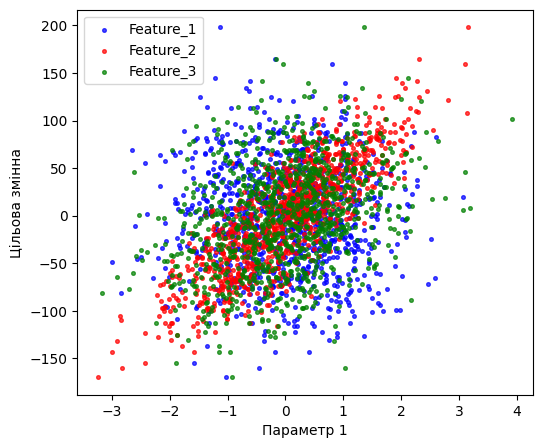

In [396]:
import matplotlib.pyplot as plt

# Створюємо графік, щоб візуалізувати згенеровані дані
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.scatter(X[:, 0], y, s=7, color='b', label='Feature_1', alpha=0.7)
plt.scatter(X[:, 1], y, s=7, color='r', label='Feature_2', alpha=0.7)
plt.scatter(X[:, 2], y, s=7, color='g', label='Feature_3', alpha=0.7)
plt.xlabel('Параметр 1')
plt.ylabel('Цільова змінна')
plt.legend()
plt.show()

### 1.2 Розподіл даних
Розділіть дані на навчальний та тестовий набори у співвідношенні 80% - 20%.

In [397]:
# Завантаження даних
data = pd.read_csv('data_for_part1.csv')

# Перегляд перших декількох рядків даних
print("---Перегляд перших декількох рядків даних---")
print(data.head(), "\n")

# Вивести інформацію про дані, такі як кількість рядків, стовпців і типи даних
print("---Вивід інформації про дані: к-сті рядків, стовпців, типу даних---")
print(data.info(), "\n")

# Вивести основні статистичні показники даних
print("---Основні статистичні показники даних---")
print(data.describe(), "\n")

---Перегляд перших декількох рядків даних---
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5     Target
0  -0.735201   1.798725  -1.095519   1.656208  -0.880754  77.812223
1  -1.613561  -1.371901  -0.172946   1.471170   1.711708 -23.236355
2   0.651391   0.954002   0.570891  -0.315269   1.135566  60.810932
3  -1.350556  -0.687014  -0.475795  -0.075871  -0.826112 -53.744184
4   1.554160   0.342338  -0.530971   0.853976  -0.335138  -0.138741 

---Вивід інформації про дані: к-сті рядків, стовпців, типу даних---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  1000 non-null   float64
 1   Feature_2  1000 non-null   float64
 2   Feature_3  1000 non-null   float64
 3   Feature_4  1000 non-null   float64
 4   Feature_5  1000 non-null   float64
 5   Target     1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB
None 

---О

In [398]:
# Розділення даних на тренувальний і тестовий набори
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1.3 Побудуйте модель регресії 
Побудуйте модель регресії на навчальних даних та оцініть її точність на тестових даних. Використовуйте будь-який регресійний алгоритм за вибором (наприклад, лінійна регресія, дерево рішень, Random Forest тощо).

Mean Squared Error: 278.19893450733974
R-squared: 0.906798838953286


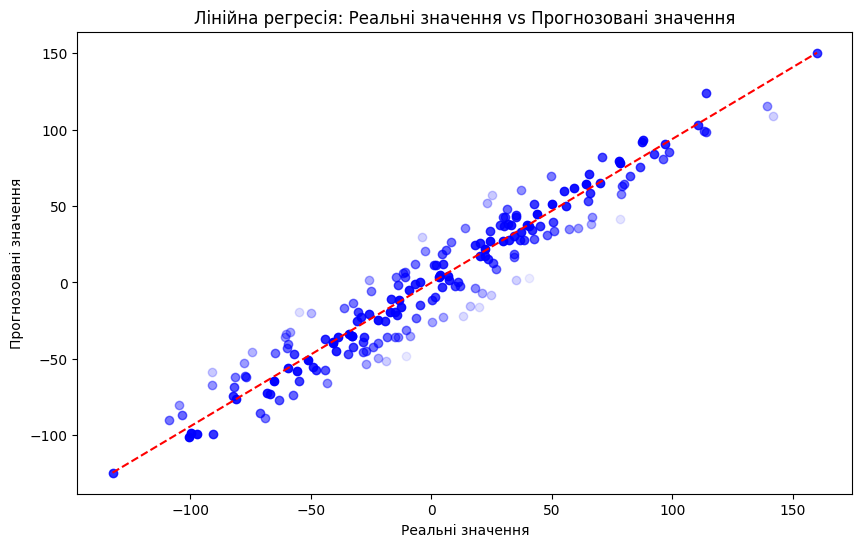

In [399]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Побудова моделі лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model.predict(X_test)

# Оцінка точності моделі
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Виведення результатів
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Відстань між справжніми та прогнозованими значеннями
distances = np.abs(y_test - y_pred)
# Максимальна відстань для налаштування прозорості
max_distance = np.max(distances)


# Візуалізація результатів з налаштуваною прозорістю
plt.figure(figsize=(10, 6))
for i in range(len(y_test)):
    alpha = 1 - (distances[i] / max_distance)  # Прозорість залежно від відстані
    plt.scatter(y_test[i], y_pred[i], c='b', alpha=alpha)

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red')
plt.xlabel("Реальні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Лінійна регресія: Реальні значення vs Прогнозовані значення")
plt.show()

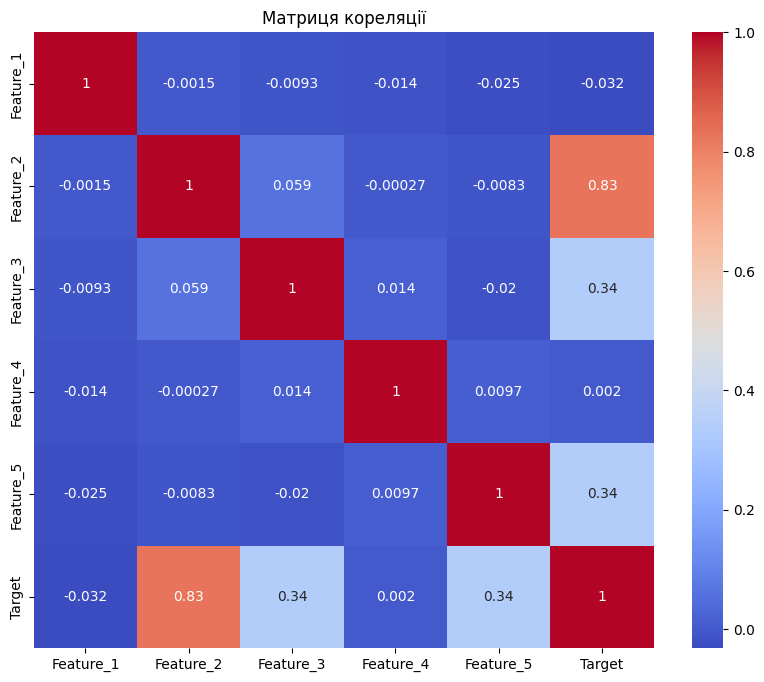

In [400]:
import seaborn as sns

# Матриця кореляції
correlation_matrix = data.corr()

# Візуалізація матриці кореляції за допомогою теплової карти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

### 1.4 Висновки
По результатам MSE та R-squared бачимо, що модель має непогану чіткість. При зменшенні шуму - точність збільшується.

## Частина 2: Аналіз часових даних

### 2.1 Набір часових даних
Знайдіть набір часових даних в Інтернеті. Це може бути, наприклад, набір даних про ціни на акції, погоду, рух транспорту, або будь-які інші дані, які залежать від часу.

In [401]:
# Приклад генерації такого набору даних (так, дле себе)

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Задаємо початкову дату і кількість днів
# start_date = '1981-01-01'
# # start_date = '2022-01-01'
# num_days = 365

# # Щоб кожен раз мати одні й ті самі дані
# np.random.seed(0)

# # Генеруємо часовий індекс
# date_index = pd.date_range(start=start_date, periods=num_days, freq='D')

# # Генеруємо тренд, сезонність та шум для руху транспорту
# trend = np.linspace(0, 10, num_days)
# seasonality = 5 * np.sin(2 * np.pi * np.arange(num_days) / 30)  # сезонність щомісяця
# noise = np.random.normal(0, 2, num_days)

# # Збираємо дані
# transport_data = trend + seasonality + noise

# # Створюємо DataFrame
# temp_df = pd.DataFrame({'TemperatureData': transport_data}, index=date_index)

# # Зберігаємо згенеровані дані у CSV-файл
# temp_df.to_csv('transport_data_for_part2.csv')

Завантаження даних з файлу

In [402]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Завантаження даних
temp_df = pd.read_csv('min_daily_temperature_for_part2.csv', parse_dates=['Date'], index_col='Date')

temp_df.head()

TemperatureData
Date                       
1989-01-01             14.3
1989-01-02             17.4
1989-01-03             18.5
1989-01-04             16.8
1989-01-05             11.5

### 2.2 Завантажте та візуалізуйте ці дані. 
Переконайтеся, що ви розумієте основні характеристики часового ряду, такі як тренд, сезонність, аномалії тощо.

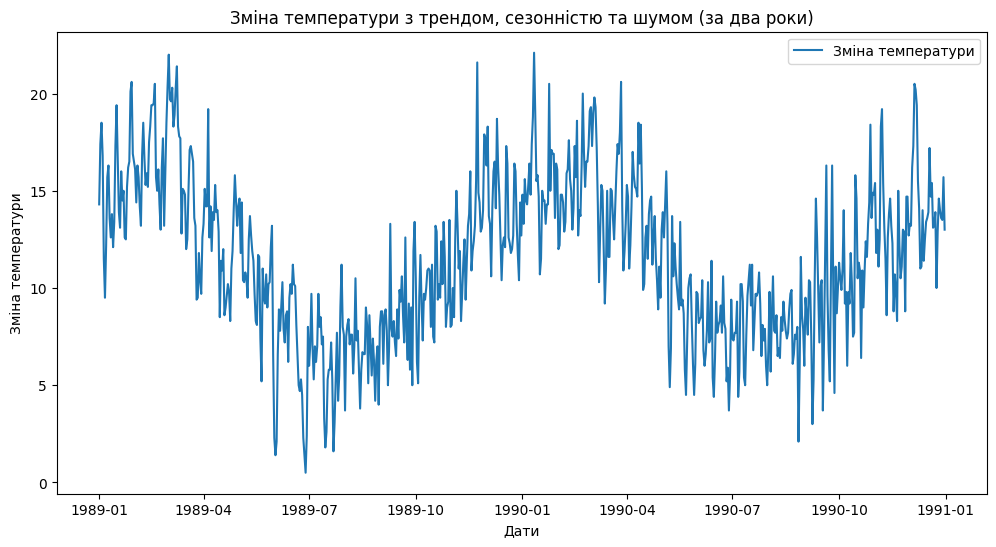

---Augmented Dickey-Fuller тест:---
ADF Statistic: -1.79
p-value: 0.38
Критичні значення:
1%: -3.44
5%: -2.87
10%: -2.57


In [403]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Візуалізація
plt.figure(figsize=(12, 6))
plt.plot(temp_df.index, temp_df['TemperatureData'], label='Зміна температури')
plt.title('Зміна температури з трендом, сезонністю та шумом (за два роки)')
plt.xlabel('Дати')
plt.ylabel('Зміна температури')
plt.legend()
plt.show()

# Перевірка стаціонарності часового ряду
result = adfuller(temp_df)
print("---Augmented Dickey-Fuller тест:---")
print(f'ADF Statistic: {result[0]:.2f}')  #  if ADF is less than: -3,5 -> значить дані є стаціонарними
# p-value допомагає визначити, чи можна відхилити нульову гіпотезу. Якщо p-value менше за 0.05),
# ... ми відхиляємо нульову гіпотезу. Це означає, що у нас є достатні докази в тому, що наші 
# ... спостереження не є випадковими
print(f'p-value: {result[1]:.2f}')
print('Критичні значення:')
for key, value in result[4].items():
    print(f'{key}: {value:.2f}')

# ADF Statistic > Критичне значення, немає достатніх доказів стаціонарності, і ми не відхиляємо нульову гіпотезу.
# ADF Statistic < Критичне значення, дані стаціонарні, підходять


### 2.3 Розкладання часового ряду даних
 Використовуйте методи аналізу часових рядів, такі як розкладання на компоненти, автокореляція тощо, для отримання інсайтів і підготовки даних для моделювання.

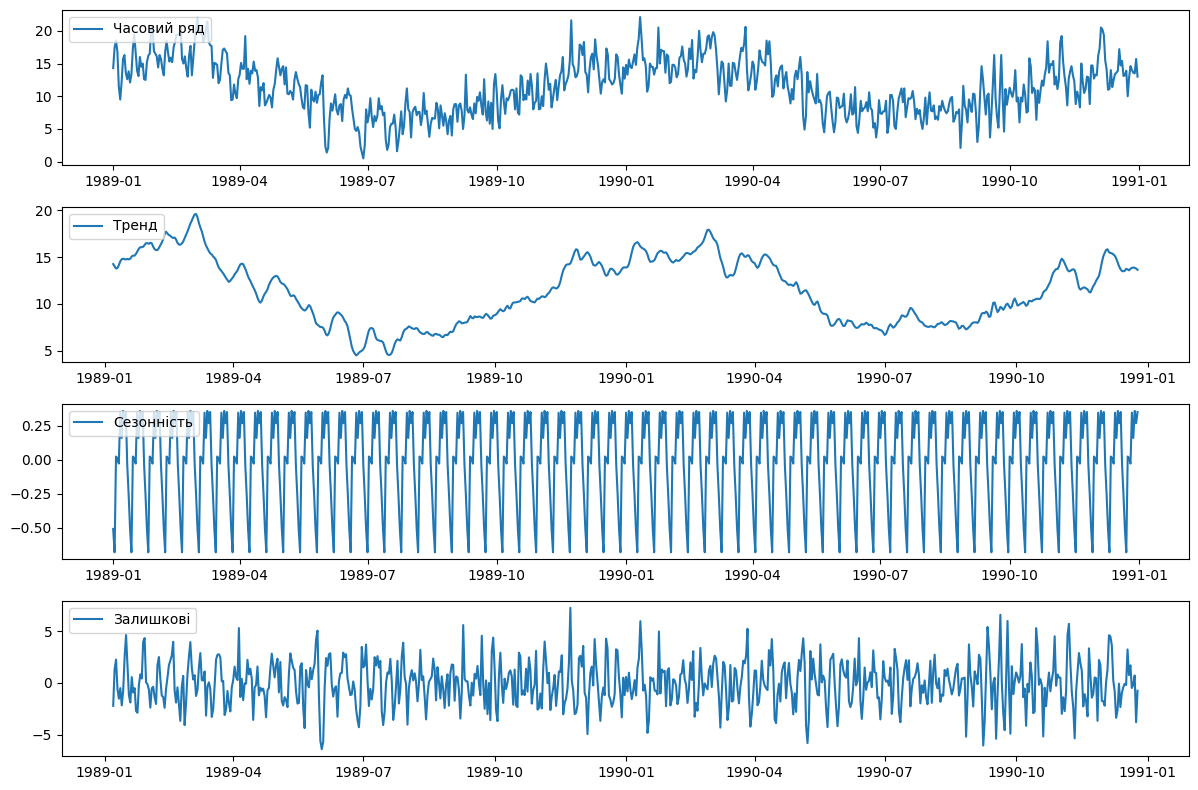

In [404]:
# Розділення часового ряду на тренд, сезонні та залишкові компоненти
decomposition = seasonal_decompose(temp_df, model='additive', period=12)
trend_component = decomposition.trend
seasonality_component = decomposition.seasonal
residuals = decomposition.resid

# Візуалізація компонентів
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(temp_df, label='Часовий ряд')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_component, label='Тренд')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonality_component, label='Сезонність')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residuals, label='Залишкові')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [405]:
# Підібираємо найкращі параметри для ARIMA
from pmdarima import auto_arima
import warnings

warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(temp_df['TemperatureData'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3237.062, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3398.578, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3382.531, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3354.892, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3396.578, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3236.574, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3246.068, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3246.632, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3236.998, Time=0.46 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3235.013, Time=0.22 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3236.995, Time=0.26 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3239.013, Time=0.29 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3233.025, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3244.078, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  730
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -1612.512
Date:                Thu, 12 Oct 2023   AIC                           3233.025
Time:                        01:40:14   BIC                           3251.391
Sample:                    01-01-1989   HQIC                          3240.111
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3646      0.034    -10.766      0.000      -0.431      -0.298
ma.L2         -0.3283      0.038     -8.541      0.000      -0.404      -0.253
ma.L3         -0.1342      0.037     -3.616      0.000      -0.207      -0.061
sigma2         4.8778      0.251     19.466      0.000       4.387       5.369
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.98   Prob(JB):                         0.65
Heteroskedasticity (H):               1.29   Skew:                             0.06
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

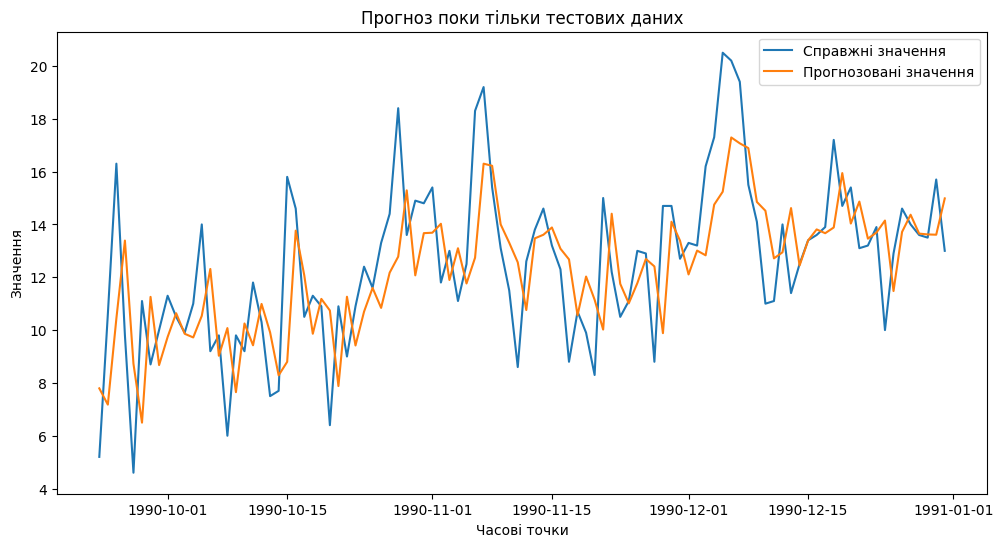

Середнє значення даних: 12.53
Середньоквадратична помилка (MSE) 2.52


In [406]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# print(temp_df.shape)
train=temp_df.iloc[:-100]
test=temp_df.iloc[-100:]
# print(train.shape, test.shape)

p, d, q = 0, 1, 3  # Параметри ARIMA
model = ARIMA(temp_df, order=(p, d, q))
model = model.fit()
# model.summary()

# Прогноз для тестових даних (для оцінки моделі)
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start, end=end, typ='levels')

# Візуалізація прогнозу та реальних значень
plt.figure(figsize=(12, 6))
plt.plot(temp_df['TemperatureData'].iloc[-100:], label='Справжні значення')
plt.plot(pred, label='Прогнозовані значення')
plt.title('Прогноз поки тільки тестових даних')
plt.xlabel('Часові точки')
plt.ylabel('Значення')
plt.legend()
plt.show()

# Оцінка точності моделі
mean = test['TemperatureData'].mean()
print(f"Середнє значення даних: {mean:.2f}")

rmse = sqrt(mean_squared_error(pred,test['TemperatureData']))
print(f"Середньоквадратична помилка (MSE) {rmse:.2f}")

In [407]:
model2=ARIMA(temp_df['TemperatureData'], order=(0,1,3))
model2=model2.fit()
temp_df.tail

<bound method NDFrame.tail of             TemperatureData
Date                       
1989-01-01             14.3
1989-01-02             17.4
1989-01-03             18.5
1989-01-04             16.8
1989-01-05             11.5
...                     ...
1990-12-27             14.0
1990-12-28             13.6
1990-12-29             13.5
1990-12-30             15.7
1990-12-31             13.0

[730 rows x 1 columns]>

In [408]:
# So indexes in date format
index_future_dates=pd.date_range(start='1990-12-31', end='1991-1-30')   

# Here prediction is made, for 30 days
pred=model2.predict(start=len(temp_df), end=len(temp_df)+30, typ='levels').rename('ARIMA Predictions')

# Indexing predictons
pred.index=index_future_dates
print(pred)

1990-12-31    13.053952
1991-01-01    13.425125
1991-01-02    13.691589
1991-01-03    13.691589
1991-01-04    13.691589
1991-01-05    13.691589
1991-01-06    13.691589
1991-01-07    13.691589
1991-01-08    13.691589
1991-01-09    13.691589
1991-01-10    13.691589
1991-01-11    13.691589
1991-01-12    13.691589
1991-01-13    13.691589
1991-01-14    13.691589
1991-01-15    13.691589
1991-01-16    13.691589
1991-01-17    13.691589
1991-01-18    13.691589
1991-01-19    13.691589
1991-01-20    13.691589
1991-01-21    13.691589
1991-01-22    13.691589
1991-01-23    13.691589
1991-01-24    13.691589
1991-01-25    13.691589
1991-01-26    13.691589
1991-01-27    13.691589
1991-01-28    13.691589
1991-01-29    13.691589
1991-01-30    13.691589
Freq: D, Name: ARIMA Predictions, dtype: float64


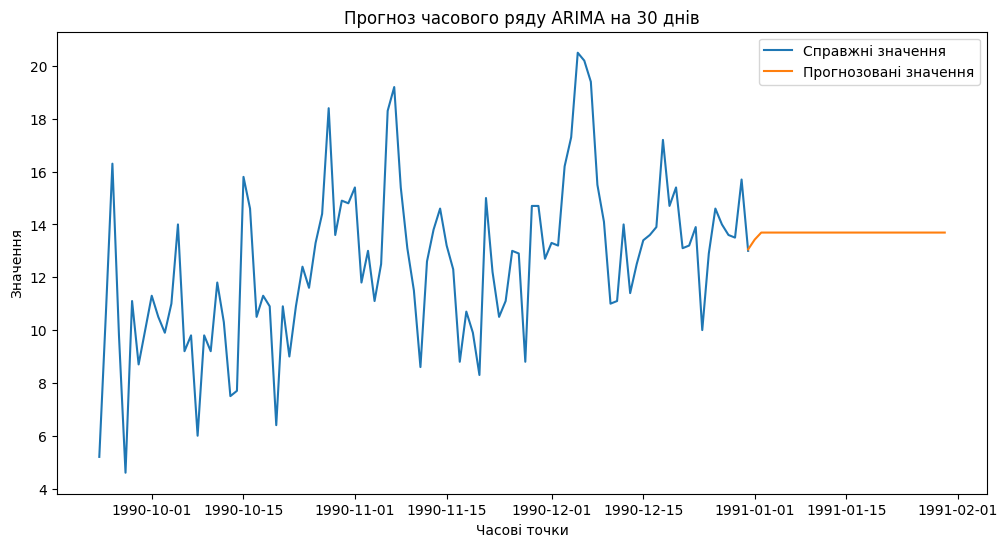

In [409]:
# Візуалізація прогнозованих даних
plt.figure(figsize=(12, 6))
plt.plot(temp_df['TemperatureData'].iloc[-100:], label='Справжні значення')
plt.plot(pred, label='Прогнозовані значення')

plt.title('Прогноз часового ряду ARIMA на 30 днів')
plt.xlabel('Часові точки')
plt.ylabel('Значення')

plt.legend()
plt.show()

### Висновки:

Як бачимо, передбачення на даних, що залежать від часу є хоч трохи чіткими тільки для декількох перших днів. Чим далі в майбутнє, тим більш неточними стають результати

### 3.1 Завантажте файл даних "AmesHousing.csv", який містить інформацію про нерухомість в місті Еймс, штат Айова, США.

In [17]:
import pandas as pd

# Завантаження даних
data = pd.read_csv('AmesHousing.csv')

In [18]:
pd.set_option('display.max_columns', None)
data.head(11)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0       1  526301100           20        RL         141.0     31770   Pave   
1       2  526350040           20        RH          80.0     11622   Pave   
2       3  526351010           20        RL          81.0     14267   Pave   
3       4  526353030           20        RL          93.0     11160   Pave   
4       5  527105010           60        RL          74.0     13830   Pave   
5       6  527105030           60        RL          78.0      9978   Pave   
6       7  527127150          120        RL          41.0      4920   Pave   
7       8  527145080          120        RL          43.0      5005   Pave   
8       9  527146030          120        RL          39.0      5389   Pave   
9      10  527162130           60        RL          60.0      7500   Pave   
10     11  527163010           60        RL          75.0     10000   Pave   

   Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0    NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
1    NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
2    NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
3    NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
4    NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
5    NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
6    NaN       Reg          Lvl    AllPub     Inside        Gtl      StoneBr   
7    NaN       IR1          HLS    AllPub     Inside        Gtl      StoneBr   
8    NaN       IR1          Lvl    AllPub     Inside        Gtl      StoneBr   
9    NaN       Reg          Lvl    AllPub     Inside        Gtl      Gilbert   
10   NaN       IR1          Lvl    AllPub     Corner        Gtl      Gilbert   

   Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0         Norm        Norm      1Fam      1Story             6             5   
1        Feedr        Norm      1Fam      1Story             5             6   
2         Norm        Norm      1Fam      1Story             6             6   
3         Norm        Norm      1Fam      1Story             7             5   
4         Norm        Norm      1Fam      2Story             5             5   
5         Norm        Norm      1Fam      2Story             6             6   
6         Norm        Norm    TwnhsE      1Story             8             5   
7         Norm        Norm    TwnhsE      1Story             8             5   
8         Norm        Norm    TwnhsE      1Story             8             5   
9         Norm        Norm      1Fam      2Story             7             5   
10        Norm        Norm      1Fam      2Story             6             5   

    Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0         1960            1960        Hip   CompShg      BrkFace      Plywood   
1         1961            1961      Gable   CompShg      VinylSd      VinylSd   
2         1958            1958        Hip   CompShg      Wd Sdng      Wd Sdng   
3         1968            1968        Hip   CompShg      BrkFace      BrkFace   
4         1997            1998      Gable   CompShg      VinylSd      VinylSd   
5         1998            1998      Gable   CompShg      VinylSd      VinylSd   
6         2001            2001      Gable   CompShg      CemntBd      CmentBd   
7         1992            1992      Gable   CompShg      HdBoard      HdBoard   
8         1995            1996      Gable   CompShg      CemntBd      CmentBd   
9         1999            1999      Gable   CompShg      VinylSd      VinylSd   
10        1993            1994      Gable   CompShg      HdBoard      HdBoard   

   Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         Stone         112.0         TA         TA     CBlock        TA   
1           NaN     

### 3.2 Вивчіть структуру даних та характеристики ознак. Визначте цільову змінну для регресії (наприклад, ціну житла).

In [19]:
# # Вибір цільової змінної (відгуку) та предикторів
# X = data.drop(['SalePrice'], axis=1)
# y = data['SalePrice']

# # Розділення даних на навчальний та тестовий набори
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# X_train

### 3.3 Виконайте підготовку даних, таку як обробка відсутніх значень, перетворення категоріальних ознак у числові, масштабування тощо.

In [21]:
# # Лінійна регресія
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# # Побудова та навчання моделі лінійної регресії
# linear_reg = LinearRegression()
# linear_reg.fit(X_train, y_train)

# # Прогноз на тестовому наборі
# y_pred_linear = linear_reg.predict(X_test)

# # Оцінка моделі
# mse_linear = mean_squared_error(y_test, y_pred_linear)
# print(f"Лінійна регресія - MSE: {mse_linear:.2f}")


In [22]:
# # Імпортуємо необхідні бібліотеки
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error, r2_score

# # Завантаження набору даних
# diabetes = load_diabetes()
# data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
# data['target'] = diabetes.target

# # Розділення даних на навчальний та тестовий набори
# X = data.drop('target', axis=1)
# y = data['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Побудова та навчання моделі лінійної регресії
# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)

# # Побудова та навчання моделі дерева рішень
# dt_model = DecisionTreeRegressor(random_state=42)
# dt_model.fit(X_train, y_train)

# # Побудова та навчання моделі регресії з підтримкою векторів (SVR)
# svr_model = SVR(kernel='linear')
# svr_model.fit(X_train, y_train)

# # Прогноз на тестових даних
# y_pred_lr = lr_model.predict(X_test)
# y_pred_dt = dt_model.predict(X_test)
# y_pred_svr = svr_model.predict(X_test)

# # Оцінка моделей
# def evaluate_model(model, y_test, y_pred):
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     return mse, r2

# mse_lr, r2_lr = evaluate_model(lr_model, y_test, y_pred_lr)
# mse_dt, r2_dt = evaluate_model(dt_model, y_test, y_pred_dt)
# mse_svr, r2_svr = evaluate_model(svr_model, y_test, y_pred_svr)

# print(f"Лінійна регресія: MSE = {mse_lr:.2f}, R^2 = {r2_lr:.2f}")
# print(f"Дерево рішень: MSE = {mse_dt:.2f}, R^2 = {r2_dt:.2f}")
# print(f"Регресія з підтримкою векторів (SVR): MSE = {mse_svr:.2f}, R^2 = {r2_svr:.2f}")

In [23]:
# # Візуалізація результатів для лінійної регресії
# plt.figure(figsize=(10, 5))
# plt.subplot(131)
# plt.scatter(y_test, y_pred_lr, color='blue')
# plt.xlabel("Справжні значення")
# plt.ylabel("Прогнозовані значення")
# plt.title("Лінійна регресія")

# # Візуалізація результатів для дерева рішень
# plt.subplot(132)
# plt.scatter(y_test, y_pred_dt, color='green')
# plt.xlabel("Справжні значення")
# plt.ylabel("Прогнозовані значення")
# plt.title("Дерево рішень")

# # Візуалізація результатів для регресії з підтримкою векторів (SVR)
# plt.subplot(133)
# plt.scatter(y_test, y_pred_svr, color='red')
# plt.xlabel("Справжні значення")
# plt.ylabel("Прогнозовані значення")
# plt.title("Регресія з підтримкою векторів (SVR)")

# plt.tight_layout()
# plt.show()

In [24]:
# Виведення перших декількох рядків даних
print(data.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
1   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
2   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
3   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual 

Перевірка на пропущені значення

In [25]:
# Перевірка на пропущені значення
missing_values = data.isnull().sum()
non_zero_missing_values = missing_values[missing_values > 0]
print(non_zero_missing_values)

Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


Очищення даних

In [26]:
# Заповнення пропущених числових значень, наприклад, середнім значенням
data['Lot Frontage'] = data['Lot Frontage'].fillna(data['Lot Frontage'].mean())
data['Mas Vnr Area'] = data['Mas Vnr Area'].fillna(data['Mas Vnr Area'].mean())
data['BsmtFin SF 1'] = data['BsmtFin SF 1'].fillna(data['BsmtFin SF 1'].mean())
data['Bsmt Unf SF'] = data['Bsmt Unf SF'].fillna(data['Bsmt Unf SF'].mean())
data['Bsmt Full Bath'] = data['Bsmt Full Bath'].fillna(data['Bsmt Full Bath'].mean())
data['Bsmt Half Bath'] = data['Bsmt Half Bath'].fillna(data['Bsmt Half Bath'].mean())
data['BsmtFin SF 2'] = data['BsmtFin SF 2'].fillna(data['BsmtFin SF 2'].mean())
data['Total Bsmt SF'] = data['Total Bsmt SF'].fillna(data['Total Bsmt SF'].mean())
data['Garage Yr Blt'] = data['Garage Yr Blt'].fillna(data['Garage Yr Blt'].mean())
data['Garage Cars'] = data['Garage Cars'].fillna(data['Garage Cars'].mean())
data['Garage Area'] = data['Garage Area'].fillna(data['Garage Area'].mean())

# Перевірка на пропущені значення
missing_values = data.isnull().sum()
non_zero_missing_values = missing_values[missing_values > 0]

print(non_zero_missing_values)

Alley             2732
Mas Vnr Type      1775
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin Type 2      81
Electrical           1
Fireplace Qu      1422
Garage Type        157
Garage Finish      159
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


In [27]:
data.isnull().sum()

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64

Перетворення текстових даних на числові

In [28]:
# Стрінгові дані
# data['Alley'] = data['Alley'].fillna(data['Alley'].mean())
# data['Mas Vnr Type'] = data['Mas Vnr Type'].fillna(data['Mas Vnr Type'].mean())
# data['Bsmt Qual'] = data['Bsmt Qual'].fillna(data['Bsmt Qual'].mean())
# data['Bsmt Cond'] = data['Bsmt Cond'].fillna(data['Bsmt Cond'].mean())
# data['Bsmt Exposure'] = data['Bsmt Exposure'].fillna(data['Bsmt Exposure'].mean())
# data['BsmtFin Type 1'] = data['BsmtFin Type 1'].fillna(data['BsmtFin Type 1'].mean())
# data['BsmtFin Type 2'] = data['BsmtFin Type 2'].fillna(data['BsmtFin Type 2'].mean())
# data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mean())
# data['Fireplace Qu'] = data['Fireplace Qu'].fillna(data['Fireplace Qu'].mean())
# data['Garage Type'] = data['Garage Type'].fillna(data['Garage Type'].mean())
# data['Garage Finish'] = data['Garage Finish'].fillna(data['Garage Finish'].mean())
# data['Garage Qual'] = data['Garage Qual'].fillna(data['Garage Qual'].mean())
# data['Garage Cond'] = data['Garage Cond'].fillna(data['Garage Cond'].mean())
# data['Pool QC'] = data['Pool QC'].fillna(data['Pool QC'].mean())
# data['Fence'] = data['Fence'].fillna(data['Fence'].mean())
# data['Misc Feature'] = data['Misc Feature'].fillna(data['Misc Feature'].mean())

In [29]:
# data.head()   # input of data

In [30]:
# data.dtypes    # input of data type

In [31]:
len(data)   # len of data

2930

In [32]:
# Counting values of column(Alley, Misc Feature) by categories 
# data["Exterior 2nd"].value_counts() 
data["Exterior 2nd"].value_counts() 

Exterior 2nd
VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     397
Plywood     274
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
PreCast       1
Other         1
Name: count, dtype: int64

This is One Hot Encoding

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# "Exterior 2nd" - problematic 
# "Bsmt Full Bath", "Bsmt Half Bath", "Full Bath", "Half Bath", "Bedroom AbvGr", 
# "Kitchen AbvGr", "TotRms AbvGrd", "Fireplaces", "Garage Cars", "Pool Area",
# "Mo Sold", "Yr Sold"
categorical_features = ["Alley", "Mas Vnr Type", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", 
                        "BsmtFin Type 1", "BsmtFin Type 2", "Electrical", "Fireplace Qu", 
                        "Garage Type", "Garage Finish", "Garage Qual", "Garage Cond", 
                        "Pool QC", "Fence", "Misc Feature", "MS Zoning", "Street", "Lot Shape", 
                        "Land Contour", "Utilities", "Lot Config", "Land Slope", "Neighborhood", 
                        "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", 
                        "Roof Matl", "Exterior 1st", "Exter Qual", "Exter Cond", "Foundation", 
                        "Bsmt Exposure"
                        # "Bsmt Qual", "Exterior 2nd", "Bsmt Cond", "Functional", "Misc Feature",
                        # "BsmtFin Type 2", "Heating", "Heating QC", "Central Air", "Kitchen Qual",
                        # "Paved Drive", "Sale Type", "Sale Condition" 
                        ]
one_hot = OneHotEncoder()
# Here we are saying transformer to take encoder and apply it to categorical_features
transformer = ColumnTransformer([("one_hot", one_hot,
                                  categorical_features)],   # list of features we would like to transform
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(X)

pd.DataFrame(transformed_X)  # into table, for better visualisation


NameError: name 'X' is not defined

More understandable output of chaged data (string->int)

In [ ]:
dummies = pd.get_dummies(data[["Alley", "Mas Vnr Type", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", 
                        "BsmtFin Type 1", "BsmtFin Type 2", "Electrical", "Fireplace Qu", 
                        "Garage Type", "Garage Finish", "Garage Qual", "Garage Cond", 
                        "Pool QC", "Fence", "Misc Feature", "MS Zoning", "Street", "Lot Shape", 
                        "Land Contour", "Utilities", "Lot Config", "Land Slope", "Neighborhood", 
                        "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", 
                        "Roof Matl", "Exterior 1st", "Exter Qual", "Exter Cond", "Foundation", 
                        "Bsmt Exposure"]])
dummies

Alley_Grvl  Alley_Pave  Mas Vnr Type_BrkCmn  Mas Vnr Type_BrkFace  \
0          False       False                False                 False   
1          False       False                False                 False   
2          False       False                False                  True   
3          False       False                False                 False   
4          False       False                False                 False   
...          ...         ...                  ...                   ...   
2925       False       False                False                 False   
2926       False       False                False                 False   
2927       False       False                False                 False   
2928       False       False                False                 False   
2929       False       False                False                  True   

      Mas Vnr Type_CBlock  Mas Vnr Type_Stone  Bsmt Qual_Ex  Bsmt Qual_Fa  \
0                   False                True         False         False   
1                   False               False         False         False   
2                   False               False         False         False   
3                   False               False         False         False   
4                   False               False         False         False   
...                   ...                 ...           ...           ...   
2925                False               False         False         False   
2926                False               False         False         False   
2927                False               False         False         False   
2928                False               False         False         False   
2929                False               False         False         False   

      Bsmt Qual_Gd  Bsmt Qual_Po  ...  Foundation_BrkTil  Foundation_CBlock  \
0            False         False  ...              False               True   
1            False         False  ...              False               True   
2            False         False  ...              False               True   
3            False         False  ...              False               True   
4             True         False  ...              False              False   
...            ...           ...  ...                ...                ...   
2925         False         False  ...              False               True   
2926          True         False  ...              False               True   
2927          True         False  ...              False              False   
2928          True         False  ...              False               True   
2929          True         False  ...              False              False   

      Foundation_PConc  Foundation_Slab  Foundation_Stone  Foundation_Wood  \
0                False            False             False            False   
1                False            False             False            False   
2                False            False             False            False   
3                False            False             False            False   
4                 True            False             False            False   
...                ...              ...               ...              ...   
2925             False            False             False            False   
2926             False            False             False            False   
2927              True            False             False            False   
2928             False            False             False            False   
2929              True            False             False            False   

      Bsmt Exposure_Av  Bsmt Exposure_Gd  Bsmt Exposure_Mn  Bsmt Exposure_No  
0                False              True             False             False  
1                False             False             False              True  
2                False             False             Fals

Let's refit the model

In [ ]:
# Перевірка на пропущені значення
missing_values = data.isnull().sum()
non_zero_missing_values = missing_values[missing_values > 0]

print(non_zero_missing_values)

Alley             2732
Mas Vnr Type      1775
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin Type 2      81
Electrical           1
Fireplace Qu      1422
Garage Type        157
Garage Finish      159
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


In [ ]:
# # Вибір цільової змінної (відгуку) та предикторів
# X = data.drop(['SalePrice'], axis=1)
# y = data['SalePrice']

# Розділення даних на навчальний та тестовий набори
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=42)

In [ ]:
# Імпортуємо необхідні бібліотеки
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Побудова та навчання моделі лінійної регресії
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Побудова та навчання моделі дерева рішень
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Побудова та навчання моделі регресії з підтримкою векторів (SVR)
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

# Прогноз на тестових даних
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)

# Оцінка моделей
def evaluate_model(model, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

mse_lr, r2_lr = evaluate_model(lr_model, y_test, y_pred_lr)
mse_dt, r2_dt = evaluate_model(dt_model, y_test, y_pred_dt)
mse_svr, r2_svr = evaluate_model(svr_model, y_test, y_pred_svr)

print(f"Лінійна регресія: MSE = {mse_lr:.2f}, R^2 = {r2_lr:.2f}")
print(f"Дерево рішень: MSE = {mse_dt:.2f}, R^2 = {r2_dt:.2f}")
print(f"Регресія з підтримкою векторів (SVR): MSE = {mse_svr:.2f}, R^2 = {r2_svr:.2f}")

ValueError: could not convert string to float: 'HdBoard'

## Частина 3: Підготовка та аналіз даних на основі файлу AmesHousing.csv

### 3.1 Завантажте файл даних "AmesHousing.csv", який містить інформацію про нерухомість в місті Еймс, штат Айова, США.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from matplotlib import colors

from sklearn.preprocessing import StandardScaler

In [101]:
import pandas as pd

# Завантаження даних
data = pd.read_csv('AmesHousing.csv')

pd.set_option('display.max_columns', None)
data.head(11)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0       1  526301100           20        RL      141.0000     31770   Pave   
1       2  526350040           20        RH       80.0000     11622   Pave   
2       3  526351010           20        RL       81.0000     14267   Pave   
3       4  526353030           20        RL       93.0000     11160   Pave   
4       5  527105010           60        RL       74.0000     13830   Pave   
5       6  527105030           60        RL       78.0000      9978   Pave   
6       7  527127150          120        RL       41.0000      4920   Pave   
7       8  527145080          120        RL       43.0000      5005   Pave   
8       9  527146030          120        RL       39.0000      5389   Pave   
9      10  527162130           60        RL       60.0000      7500   Pave   
10     11  527163010           60        RL       75.0000     10000   Pave   

   Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0    NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
1    NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
2    NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
3    NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
4    NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
5    NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
6    NaN       Reg          Lvl    AllPub     Inside        Gtl      StoneBr   
7    NaN       IR1          HLS    AllPub     Inside        Gtl      StoneBr   
8    NaN       IR1          Lvl    AllPub     Inside        Gtl      StoneBr   
9    NaN       Reg          Lvl    AllPub     Inside        Gtl      Gilbert   
10   NaN       IR1          Lvl    AllPub     Corner        Gtl      Gilbert   

   Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0         Norm        Norm      1Fam      1Story             6             5   
1        Feedr        Norm      1Fam      1Story             5             6   
2         Norm        Norm      1Fam      1Story             6             6   
3         Norm        Norm      1Fam      1Story             7             5   
4         Norm        Norm      1Fam      2Story             5             5   
5         Norm        Norm      1Fam      2Story             6             6   
6         Norm        Norm    TwnhsE      1Story             8             5   
7         Norm        Norm    TwnhsE      1Story             8             5   
8         Norm        Norm    TwnhsE      1Story             8             5   
9         Norm        Norm      1Fam      2Story             7             5   
10        Norm        Norm      1Fam      2Story             6             5   

    Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0         1960            1960        Hip   CompShg      BrkFace      Plywood   
1         1961            1961      Gable   CompShg      VinylSd      VinylSd   
2         1958            1958        Hip   CompShg      Wd Sdng      Wd Sdng   
3         1968            1968        Hip   CompShg      BrkFace      BrkFace   
4         1997            1998      Gable   CompShg      VinylSd      VinylSd   
5         1998            1998      Gable   CompShg      VinylSd      VinylSd   
6         2001            2001      Gable   CompShg      CemntBd      CmentBd   
7         1992            1992      Gable   CompShg      HdBoard      HdBoard   
8         1995            1996      Gable   CompShg      CemntBd      CmentBd   
9         1999            1999      Gable   CompShg      VinylSd      VinylSd   
10        1993            1994      Gable   CompShg      HdBoard      HdBoard   

   Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         Stone      112.0000         TA         TA     CBlock        TA   
1           NaN     

In [102]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [103]:
data.isnull().sum()

Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        490
Lot Area              0
Street                0
Alley              2732
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type       1775
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          1
BsmtFin Type 2       81
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [104]:
# If there is duplicate rows
data.duplicated().sum()

0

### 3.2 Підготовка даних

3.2.1 Заповнення пропущених числових значень 

In [105]:
# Заповнення пропущених числових значень, наприклад, середнім значенням
data['Lot Frontage'] = data['Lot Frontage'].fillna(data['Lot Frontage'].median())
data['Mas Vnr Area'] = data['Mas Vnr Area'].fillna(data['Mas Vnr Area'].median())
data['BsmtFin SF 1'] = data['BsmtFin SF 1'].fillna(data['BsmtFin SF 1'].median())
data['Bsmt Unf SF'] = data['Bsmt Unf SF'].fillna(data['Bsmt Unf SF'].median())
data['Bsmt Full Bath'] = data['Bsmt Full Bath'].fillna(data['Bsmt Full Bath'].median())
data['Bsmt Half Bath'] = data['Bsmt Half Bath'].fillna(data['Bsmt Half Bath'].median())
data['BsmtFin SF 2'] = data['BsmtFin SF 2'].fillna(data['BsmtFin SF 2'].median())
data['Total Bsmt SF'] = data['Total Bsmt SF'].fillna(data['Total Bsmt SF'].median())
data['Garage Yr Blt'] = data['Garage Yr Blt'].fillna(data['Garage Yr Blt'].median())
data['Garage Cars'] = data['Garage Cars'].fillna(data['Garage Cars'].median())
data['Garage Area'] = data['Garage Area'].fillna(data['Garage Area'].median())

data.isnull().sum()

Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Alley              2732
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type       1775
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          0
BsmtFin Type 2       81
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC      

3.2.2 Looking for columns with one type of data (to remove them).

In [106]:
data.nunique()

# Нема колонок з одаковим значенням

Order              2930
PID                2930
MS SubClass          16
MS Zoning             7
Lot Frontage        128
Lot Area           1960
Street                2
Alley                 2
Lot Shape             4
Land Contour          4
Utilities             3
Lot Config            5
Land Slope            3
Neighborhood         28
Condition 1           9
Condition 2           8
Bldg Type             5
House Style           8
Overall Qual         10
Overall Cond          9
Year Built          118
Year Remod/Add       61
Roof Style            6
Roof Matl             8
Exterior 1st         16
Exterior 2nd         17
Mas Vnr Type          4
Mas Vnr Area        445
Exter Qual            4
Exter Cond            5
Foundation            6
Bsmt Qual             5
Bsmt Cond             5
Bsmt Exposure         4
BsmtFin Type 1        6
BsmtFin SF 1        995
BsmtFin Type 2        6
BsmtFin SF 2        274
Bsmt Unf SF        1137
Total Bsmt SF      1058
Heating               6
Heating QC      

In [107]:
# #To remove the NA values
# print(len(data))
# data = data.dropna()
# print("The total number of data-points after removing the rows with missing values are:", len(data))

In [108]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']


3.2.3 Turning all into numbers

In [109]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


### 3.3 Scaling + training model

In [110]:
#Creating a copy of data
ds = data.copy()

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [111]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Order     PID  MS SubClass  MS Zoning  Lot Frontage  Lot Area  Street  \
0 -1.7315 -0.9972      -0.8770     0.0379        3.3757    2.7444  0.0641   
1 -1.7303 -0.9969      -0.8770    -1.1175        0.5150    0.1871  0.0641   
2 -1.7291 -0.9969      -0.8770     0.0379        0.5618    0.5228  0.0641   
3 -1.7279 -0.9969      -0.8770     0.0379        1.1246    0.1285  0.0641   
4 -1.7267 -0.9929       0.0613     0.0379        0.2336    0.4673  0.0641   

   Alley  Lot Shape  Land Contour  Utilities  Lot Config  Land Slope  \
0 0.2568    -1.3743        0.3160    -0.0308     -1.9052     -0.2158   
1 0.2568     0.7506        0.3160    -0.0308      0.5891     -0.2158   
2 0.2568    -1.3743        0.3160    -0.0308     -1.9052     -0.2158   
3 0.2568     0.7506        0.3160    -0.0308     -1.9052     -0.2158   
4 0.2568    -1.3743        0.3160    -0.0308      0.5891     -0.2158   

   Neighborhood  Condition 1  Condition 2  Bldg Type  House Style  \
0        0.0823      -0.0462      -0.0098    -0.4243      -0.5360   
1        0.0823      -1.1926      -0.0098    -0.4243      -0.5360   
2        0.0823      -0.0462      -0.0098    -0.4243      -0.5360   
3        0.0823      -0.0462      -0.0098    -0.4243      -0.5360   
4       -0.8967      -0.0462      -0.0098    -0.4243       1.0344   

   Overall Qual  Overall Cond  Year Built  Year Remod/Add  Roof Style  \
0       -0.0673       -0.5067     -0.3755         -1.1635      1.9585   
1       -0.7761        0.3931     -0.3425         -1.1155     -0.4818   
2       -0.0673        0.3931     -0.4417         -1.2594      1.9585   
3        0.6416       -0.5067     -0.1110         -0.7799      1.9585   
4       -0.7761       -0.5067      0.8480          0.6585     -0.4818   

   Roof Matl  Exterior 1st  Exterior 2nd  Mas Vnr Type  Mas Vnr Area  \
0    -0.1167       -1.9618       -0.2179        0.0152        0.0610   
1    -0.1167        0.7780        0.7828        0.7437       -0.5660   
2    -0.1167        1.0519        1.0329       -1.4420        0.0387   
3    -0.1167       -1.9618       -1.9690        0.7437       -0.5660   
4    -0.1167        0.7780        0.7828        0.7437       -0.5660   

   Exter Qual  Exter Cond  Foundation  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
0      0.6714      0.3757     -0.5406     0.9264    -2.5825        -1.1507   
1      0.6714      0.3757     -0.5406     0.9264     0.2372         0.5863   
2      0.6714      0.3757     -0.5406     0.9264     0.2372         0.5863   
3     -0.7541      0.3757     -0.5406     0.9264     0.2372         0.5863   
4      0.6714      0.3757      0.8367    -0.5584     0.2372         0.5863   

   BsmtFin Type 1  BsmtFin SF 1  BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  \
0         -0.9919        0.4312          0.2831       -0.2939      -0.2691   
1          0.6209        0.0558         -1.6869        0.5576      -0.6583   
2         -1.5295        1.0548          0.2831       -0.2939      -0.3488   
3         -1.5295        1.3666          0.2831       -0.2939       1.1057   
4         -0.4543        0.7650          0.2831       -0.2939      -0.9610   

   Total Bsmt SF  Heating  Heating QC  Central Air  Electrical  1st Flr SF  \
0         0.0645  -0.1030     -0.3091       0.2677      0.2996      1.2670   
1        -0.3850  -0.1030      1.4115       0.2677      0.2996     -0.6726   
2         0.6298  -0.1030      1.4115       0.2677      0.2996      0.4324   
3         2.4029  -0.1030     -0.8826       0.2677      0.2996      2.4257   
4        -0.2806  -0.1030      0.2644       0.2677      0.2996     -0.5910   

   2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  \
0     -0.7832          -0.1010       0.3093          1.0844         -0.2492   
1     -0.7832          -0.1010      -1.1944         -0.8216         -0.2492   
2     -0.7832          -0.1010      -0.3377         -0.8216         -0.2492   
3     -0.7832          -0.1010       1.2075          1.0844         -0.2492   
4      0.8534      

In [119]:
scaled_ds.isnull().sum()

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

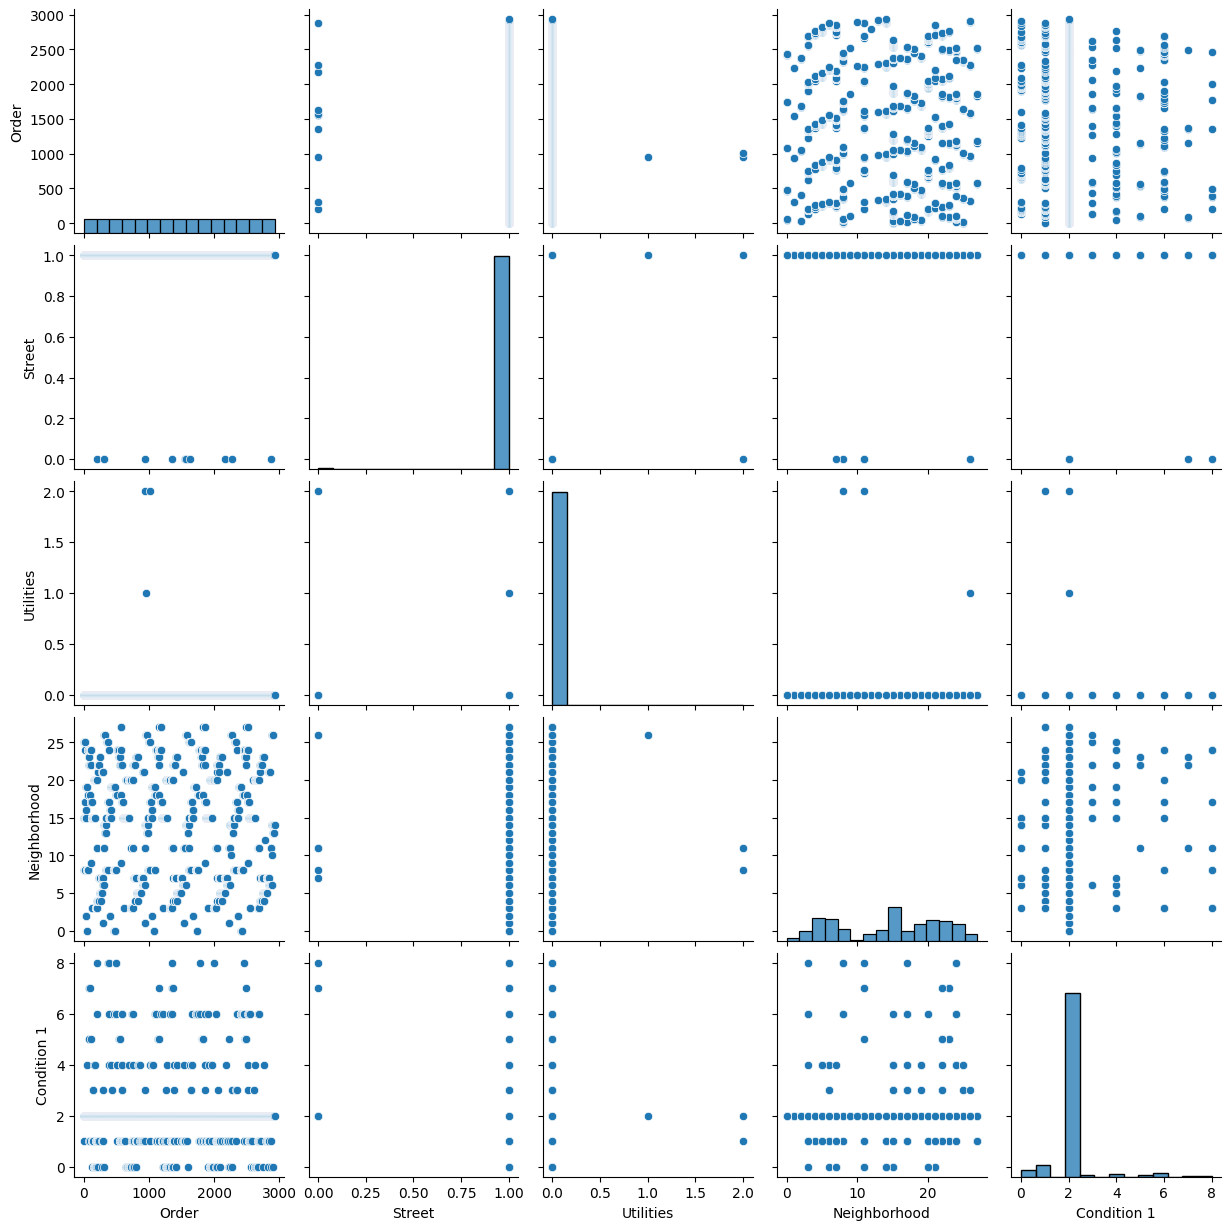

In [113]:
#To plot some selected features 

#Plotting following features
To_Plot = [ "Order", "Street", "Utilities", "Neighborhood", "Condition 1"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot])
#Taking hue 
plt.show()

In [116]:
#correlation matrix
corrmat= scaled_ds.corr()
plt.figure(figsize=(100,100))  
sns.heatmap(corrmat,annot=True, center=0)

<Axes: >

### 3.4 Dimensionality (Feature) Reduction

In [120]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count    mean    std     min     25%     50%    75%     max
col1 2930.0000 -0.0000 3.4688 -8.4568 -2.7498 -0.2525 2.4045 16.8240
col2 2930.0000 -0.0000 2.0236 -5.8165 -1.6653  0.0533 1.3962  8.9611
col3 2930.0000  0.0000 1.9751 -5.8750 -1.1732  0.0558 1.1825 15.4451

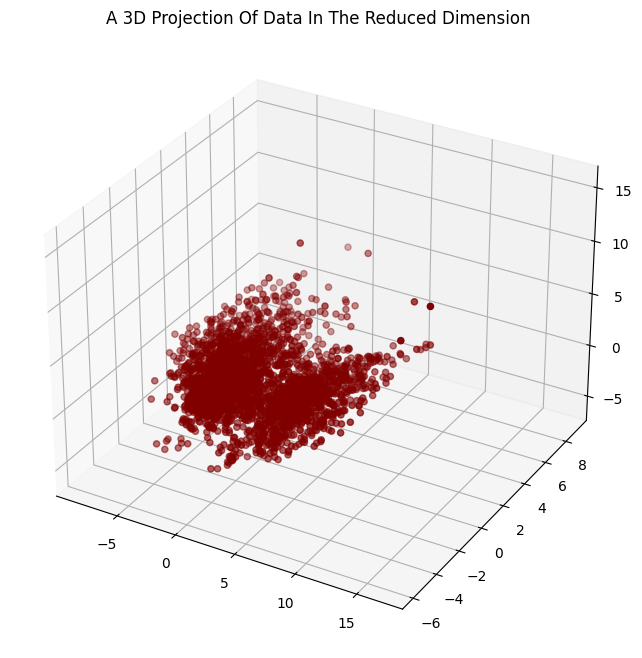

In [121]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### 3.5 Clustering

In [123]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

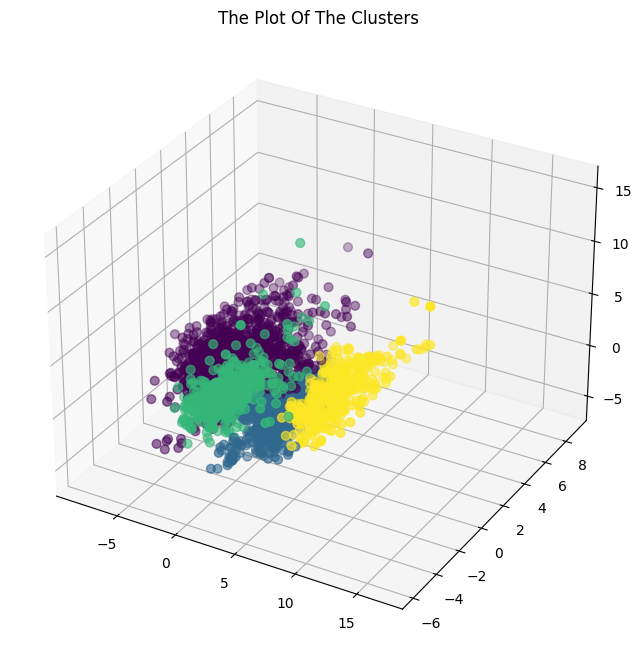

In [124]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

### 3.6 Evaluating Model

Looking at the group distribution of clustring

C:\Users\Анна\AppData\Local\Temp\ipykernel_276\1859745431.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"], palette= pal)


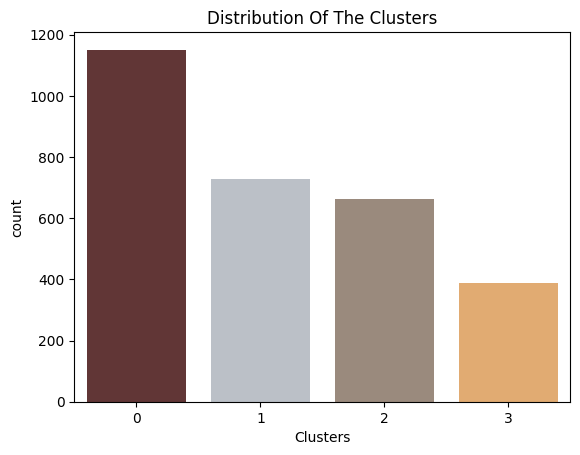

In [127]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

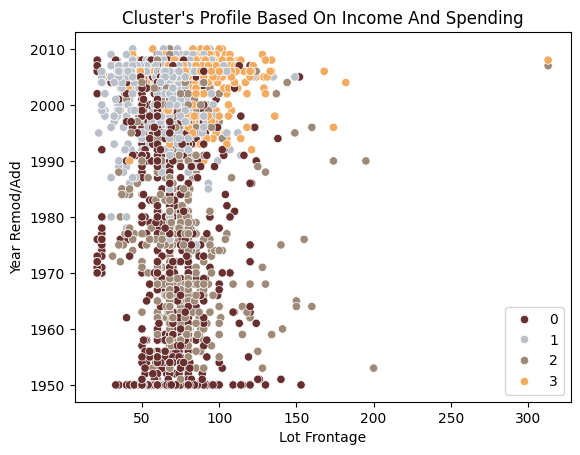

In [134]:
pl = sns.scatterplot(data = scaled_ds,x=data["Lot Frontage"], y=data["Year Remod/Add"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Lot Frontage and Year Remod/Add")
plt.legend()
plt.show()

Висновок: Вийшло проаналізувати дані, натренувати модель, та виявити певну закономірність